In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data
file_path = '/content/creditcard.csv'
data = pd.read_csv(file_path)

In [3]:
# Check for missing values
if data.isnull().sum().any():
    data = data.dropna()  # Simplest approach: remove rows with missing values


In [4]:
# Feature engineering: Scale the 'Amount' feature
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(['Amount'], axis=1, inplace=True)  # Drop the original 'Amount' column


In [5]:
# Define features and target variable
X = data.drop(['Class'], axis=1)
y = data['Class']


In [6]:
# Split the data into training and testing sets, ensuring stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Define the model: Random Forest Classifier
model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', n_jobs=-1)


In [9]:
# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       random_state=42)

In [10]:
# Predictions and performance metrics
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


<Figure size 800x600 with 0 Axes>

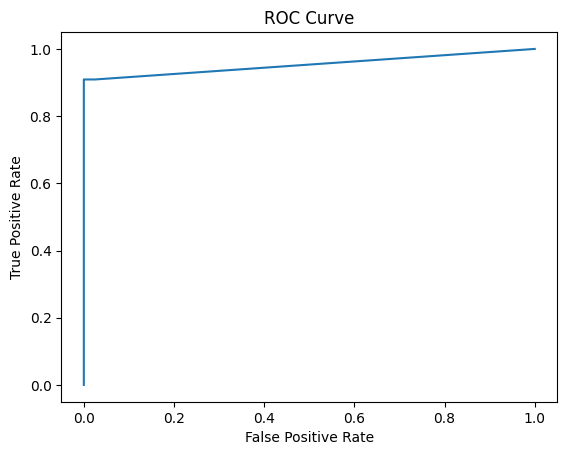

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay

# Assuming 'y_test' is your test set labels and 'y_pred_proba' is the probability estimates of the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
plt.show()


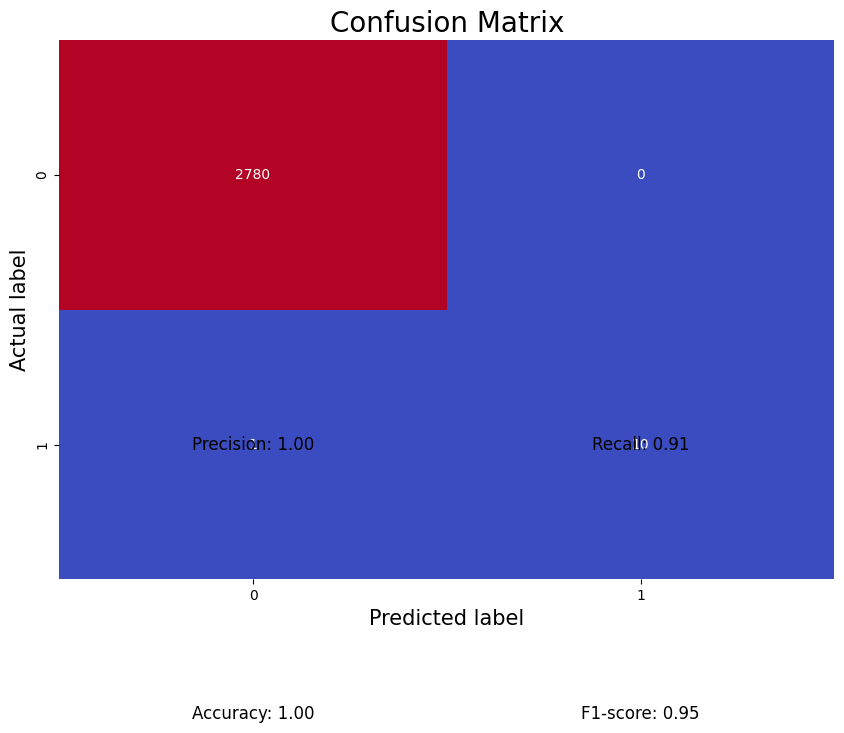

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predict the test set results
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate other classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix', fontsize=20)
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)

# Add metrics to plot
plt.text(0.5, 2.5, f'Accuracy: {accuracy:.2f}', ha='center', va='center', size='large')
plt.text(0.5, 1.5, f'Precision: {precision:.2f}', ha='center', va='center', size='large')
plt.text(1.5, 1.5, f'Recall: {recall:.2f}', ha='center', va='center', size='large')
plt.text(1.5, 2.5, f'F1-score: {f1:.2f}', ha='center', va='center', size='large')

plt.show()


In [11]:
# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)


In [12]:
# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nROC AUC Score:")
print(roc_auc)


Confusion Matrix:
[[2780    0]
 [   1   10]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2780
         1.0       1.00      0.91      0.95        11

    accuracy                           1.00      2791
   macro avg       1.00      0.95      0.98      2791
weighted avg       1.00      1.00      1.00      2791


ROC AUC Score:
0.9534172661870505
